# 1. Imports

## Import libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import math
import sqlite3 
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from math import ceil 
from collections import Counter
from scipy.cluster.hierarchy import dendrogram

from sklearn.impute import KNNImputer 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder, RobustScaler
from pandas_profiling import ProfileReport
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.base import clone
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.model_selection import train_test_split

import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView

## Import dataset

In [2]:
df = pd.read_csv('XYZ_sports_dataset.csv', delimiter=';')

__Copy of the original dataset:__

In [3]:
df_original = df.copy()

-------------------------------

# 2. Data Exploration

## Data Overview

In [4]:
df.head()

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
0,10000,60,Female,5500.0,03/09/2019,31/10/2019,01/07/2019,31/12/2019,30/10/2019,1,...,0.0,9.0,7,NaN,6.28,2,0,0.0,0,0
1,10001,29,Female,2630.0,12/08/2014,14/09/2015,01/01/2015,31/12/2015,16/07/2015,60,...,0.0,23.0,1,2.0,17.42,1,2,0.0,0,1
2,10002,23,Male,1980.0,02/05/2017,01/06/2017,01/01/2017,30/06/2017,25/05/2017,7,...,0.0,6.0,0,7.0,30.03,6,0,0.0,0,1
3,10003,9,Male,0.0,05/09/2018,12/02/2019,01/07/2018,30/06/2019,21/01/2019,22,...,0.0,20.0,2,2.0,17.72,3,0,0.0,0,1
4,10004,35,Male,4320.0,20/04/2016,07/06/2018,01/01/2018,30/06/2018,09/11/2017,210,...,NaN,41.0,0,7.0,60.97,0,3,0.0,0,1


In [5]:
df.shape

(14942, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14942 entries, 0 to 14941
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          14942 non-null  int64  
 1   Age                         14942 non-null  int64  
 2   Gender                      14942 non-null  object 
 3   Income                      14447 non-null  float64
 4   EnrollmentStart             14942 non-null  object 
 5   EnrollmentFinish            14942 non-null  object 
 6   LastPeriodStart             14942 non-null  object 
 7   LastPeriodFinish            14942 non-null  object 
 8   DateLastVisit               14942 non-null  object 
 9   DaysWithoutFrequency        14942 non-null  int64  
 10  LifetimeValue               14942 non-null  float64
 11  UseByTime                   14942 non-null  int64  
 12  AthleticsActivities         14906 non-null  float64
 13  WaterActivities             149

In [7]:
# check descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,14942.0,17470.500000,4313.528196,10000.00,13735.25,17470.50,21205.750,24941.00
Age,14942.0,26.015794,14.156582,0.00,19.00,23.00,31.000,87.00
Income,14447.0,2230.816086,1566.527734,0.00,1470.00,1990.00,2790.000,10890.00
DaysWithoutFrequency,14942.0,81.224936,144.199576,0.00,13.00,41.00,83.750,1745.00
LifetimeValue,14942.0,302.561871,364.319566,0.00,83.60,166.20,355.075,6727.80
UseByTime,14942.0,0.047116,0.211893,0.00,0.00,0.00,0.000,1.00
AthleticsActivities,14906.0,0.007380,0.085590,0.00,0.00,0.00,0.000,1.00
WaterActivities,14905.0,0.296209,0.456600,0.00,0.00,0.00,1.000,1.00
FitnessActivities,14907.0,0.576038,0.494201,0.00,0.00,1.00,1.000,1.00
DanceActivities,14906.0,0.000000,0.000000,0.00,0.00,0.00,0.000,0.00


In [8]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [9]:
# fix wrong dtypes
bool = ['UseByTime', 'AthleticsActivities', 'WaterActivities', 'FitnessActivities',
        'DanceActivities', 'TeamActivities', 'RacketActivities', 'CombatActivities',
        'NatureActivities', 'SpecialActivities', 'OtherActivities', 'HasReferences', 'Dropout']  
for i in bool:
    df[i]=df[i].astype("boolean") # converting to "boolean" over "bool" allows preservation of NaNs

date_columns = ['EnrollmentStart','EnrollmentFinish','LastPeriodStart','LastPeriodFinish','DateLastVisit']
for i in date_columns:
    df[i] = pd.to_datetime(df[i], format='%d/%m/%Y')

df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
# 0 Female | 1 Male

df.dtypes

ID                                     int64
Age                                    int64
Gender                                 int32
Income                               float64
EnrollmentStart               datetime64[ns]
EnrollmentFinish              datetime64[ns]
LastPeriodStart               datetime64[ns]
LastPeriodFinish              datetime64[ns]
DateLastVisit                 datetime64[ns]
DaysWithoutFrequency                   int64
LifetimeValue                        float64
UseByTime                            boolean
AthleticsActivities                  boolean
WaterActivities                      boolean
FitnessActivities                    boolean
DanceActivities                      boolean
TeamActivities                       boolean
RacketActivities                     boolean
CombatActivities                     boolean
NatureActivities                     boolean
SpecialActivities                    boolean
OtherActivities                      boolean
NumberOfFr

In [10]:
# Extract relevant time features
#df['EnrollmentStartYear'] = df['EnrollmentStart'].dt.year
#df['EnrollmentStartMonth'] = df['EnrollmentStart'].dt.month
#df['EnrollmentFinishYear'] = df['EnrollmentFinish'].dt.year
#df['EnrollmentFinishMonth'] = df['EnrollmentFinish'].dt.month
#df['LastVisitYear'] = df['DateLastVisit'].dt.year
#df['LastVisitMonth'] = df['DateLastVisit'].dt.month

# Drop the original date columns
#df = df.drop(columns=date_columns)

In [11]:
# Duplicated observations
df.duplicated().sum()

0

In [12]:
# Remove column 'ID' because it's an identifier and doesn't contribute to the clustering process
#df.drop('ID', axis=1, inplace=True)
df[df.duplicated(keep=False)]

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout


In [13]:
# Remove columns 'DanceActivities' and 'NatureActivities' because both have only 1 value
df = df.drop(columns=['DanceActivities','NatureActivities'])

In [14]:
# Em certas observações, 'HasReferences' tem valor 1 quando 'NumberOfReferences’ é 0
df[['HasReferences']].mode().loc[0]

HasReferences    False
Name: 0, dtype: boolean

In [15]:
# Como a moda de 'HasReferences' é 0, então nas observações em que 'HasReferences'==1
# e 'NumberOfReferences'==0, faz sentido mudar a variável 'HasReferences' para 0, em vez de
# mudarmos 'NumberOfReferences' para outro valor

df.loc[(df['HasReferences'] == 1) & (df['NumberOfReferences'] == 0), 'HasReferences'] = False

__Definig metric and non metric features__

In [16]:
metric_features = ['Age', 'Income', 'DaysWithoutFrequency', 'LifetimeValue', 'NumberOfFrequencies',
                   'AttendedClasses', 'AllowedWeeklyVisitsBySLA', 'AllowedNumberOfVisitsBySLA',
                   'RealNumberOfVisits', 'NumberOfRenewals', 'NumberOfReferences']
non_metric_features = df.columns.drop(metric_features).tolist()
print(non_metric_features)

['ID', 'Gender', 'EnrollmentStart', 'EnrollmentFinish', 'LastPeriodStart', 'LastPeriodFinish', 'DateLastVisit', 'UseByTime', 'AthleticsActivities', 'WaterActivities', 'FitnessActivities', 'TeamActivities', 'RacketActivities', 'CombatActivities', 'SpecialActivities', 'OtherActivities', 'HasReferences', 'Dropout']


## Visualizations

__Non-Metric Variables' Absolute Frequencies__

Loaded backend module://matplotlib_inline.backend_inline version unknown.
Loaded backend module://matplotlib_inline.backend_inline version unknown.
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
findfont: score(FontEntry(fname='C:\\Users\\maria\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmss10.ttf', name='cmss10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\maria\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\maria\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.0

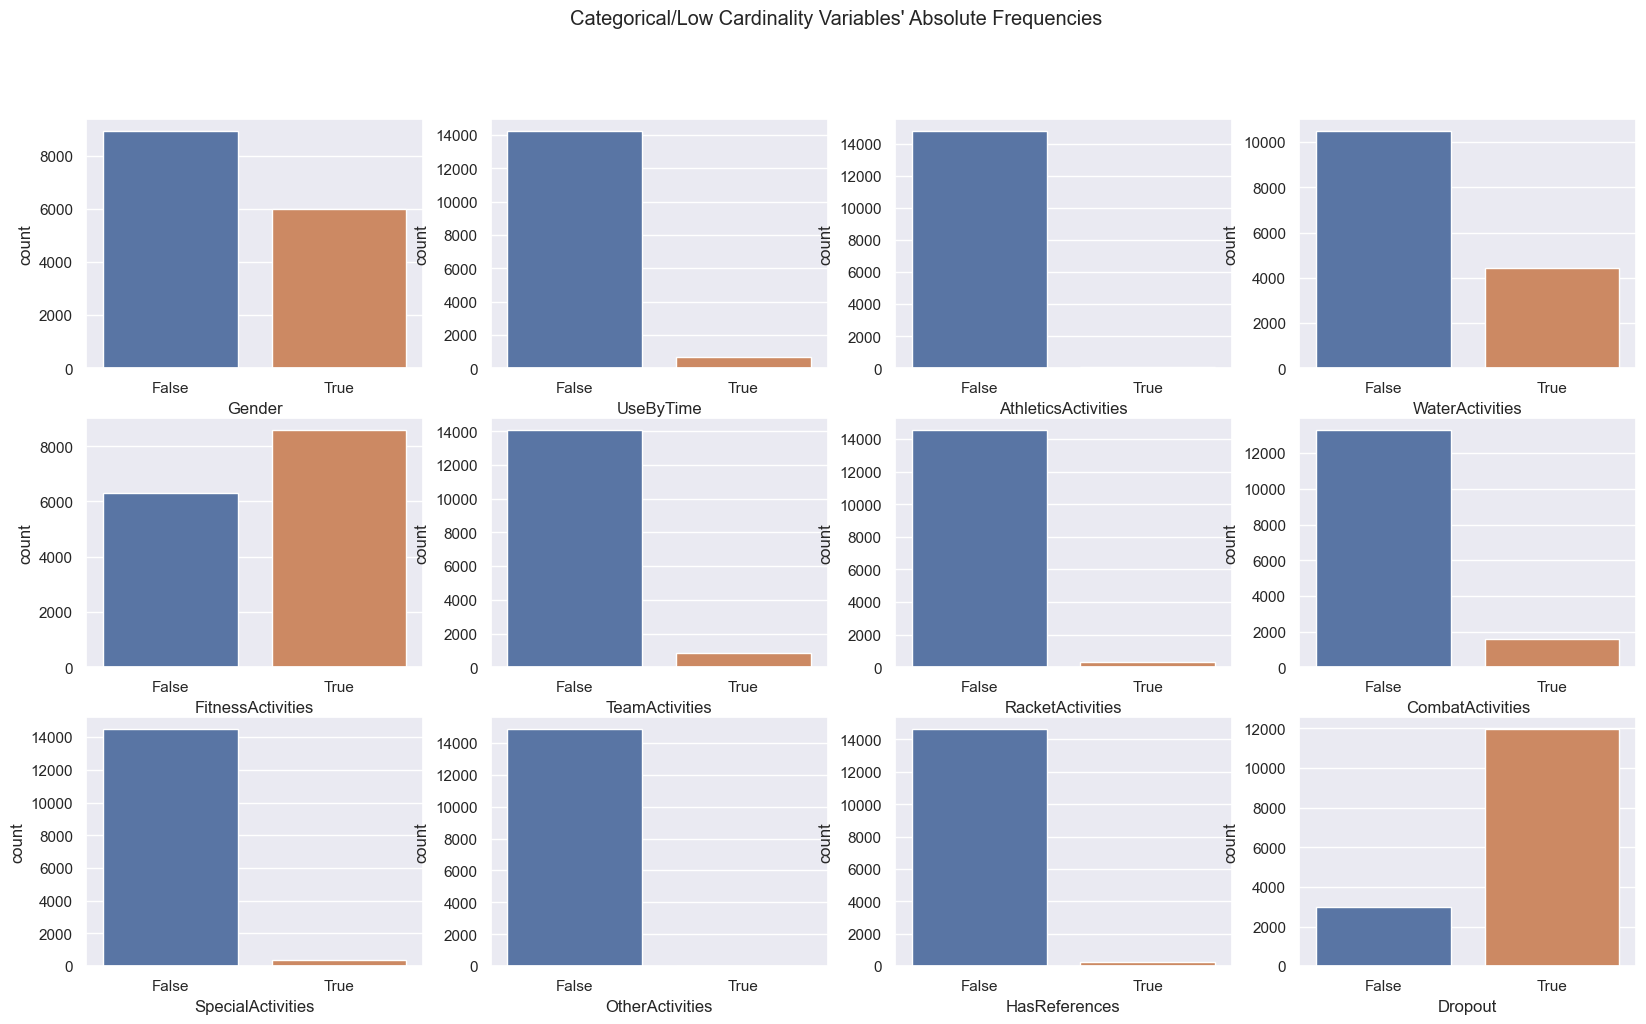

In [17]:
sns.set()

abs_freq_columns = ['Gender', 'UseByTime', 'AthleticsActivities', 'WaterActivities', 'FitnessActivities', 'TeamActivities',
                    'RacketActivities', 'CombatActivities', 'SpecialActivities', 'OtherActivities', 'HasReferences', 'Dropout']

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(3, ceil(len(abs_freq_columns) / 3), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each bar plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), abs_freq_columns): # Notice the zip() function and flatten() method
    sns.countplot(x=df[feat].astype(object), ax=ax, order=(False,True))

plt.suptitle("Categorical/Low Cardinality Variables' Absolute Frequencies")
plt.show()

__Numeric Variables' Histograms__

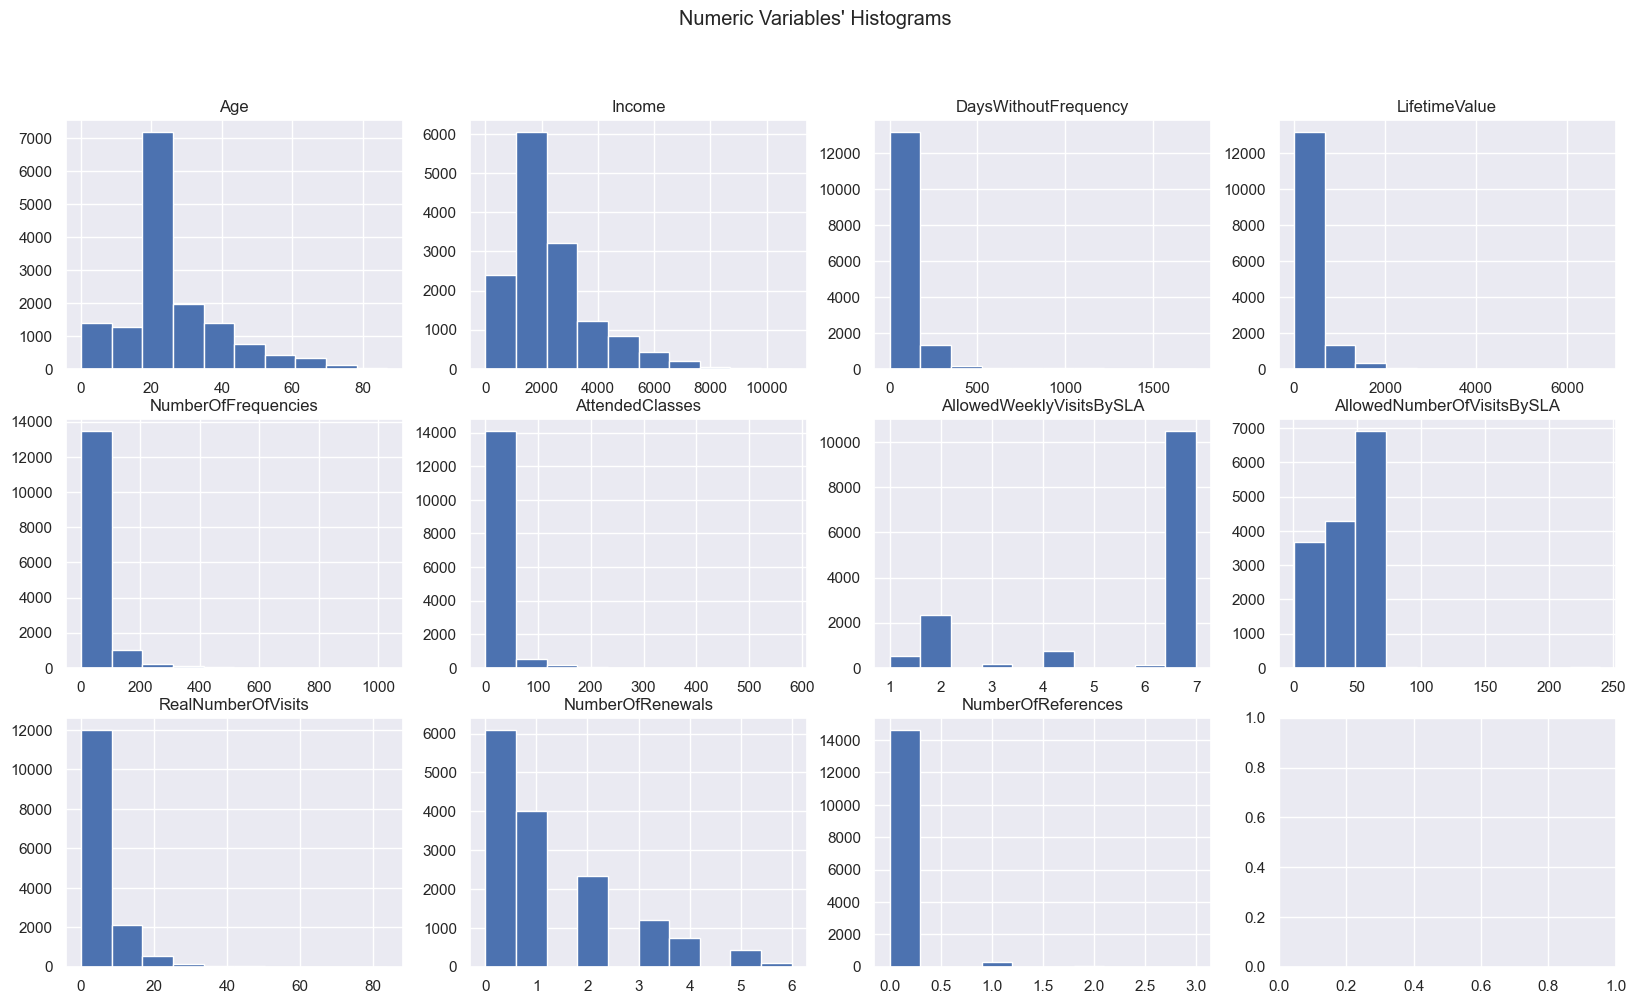

In [18]:
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram
for ax, feat in zip(axes.flatten(), metric_features):
    ax.hist(df[feat])
    ax.set_title(feat)

plt.suptitle("Numeric Variables' Histograms")
plt.show()

__Numeric Variables' Box Plots__

In [19]:
df_copy = df.copy()

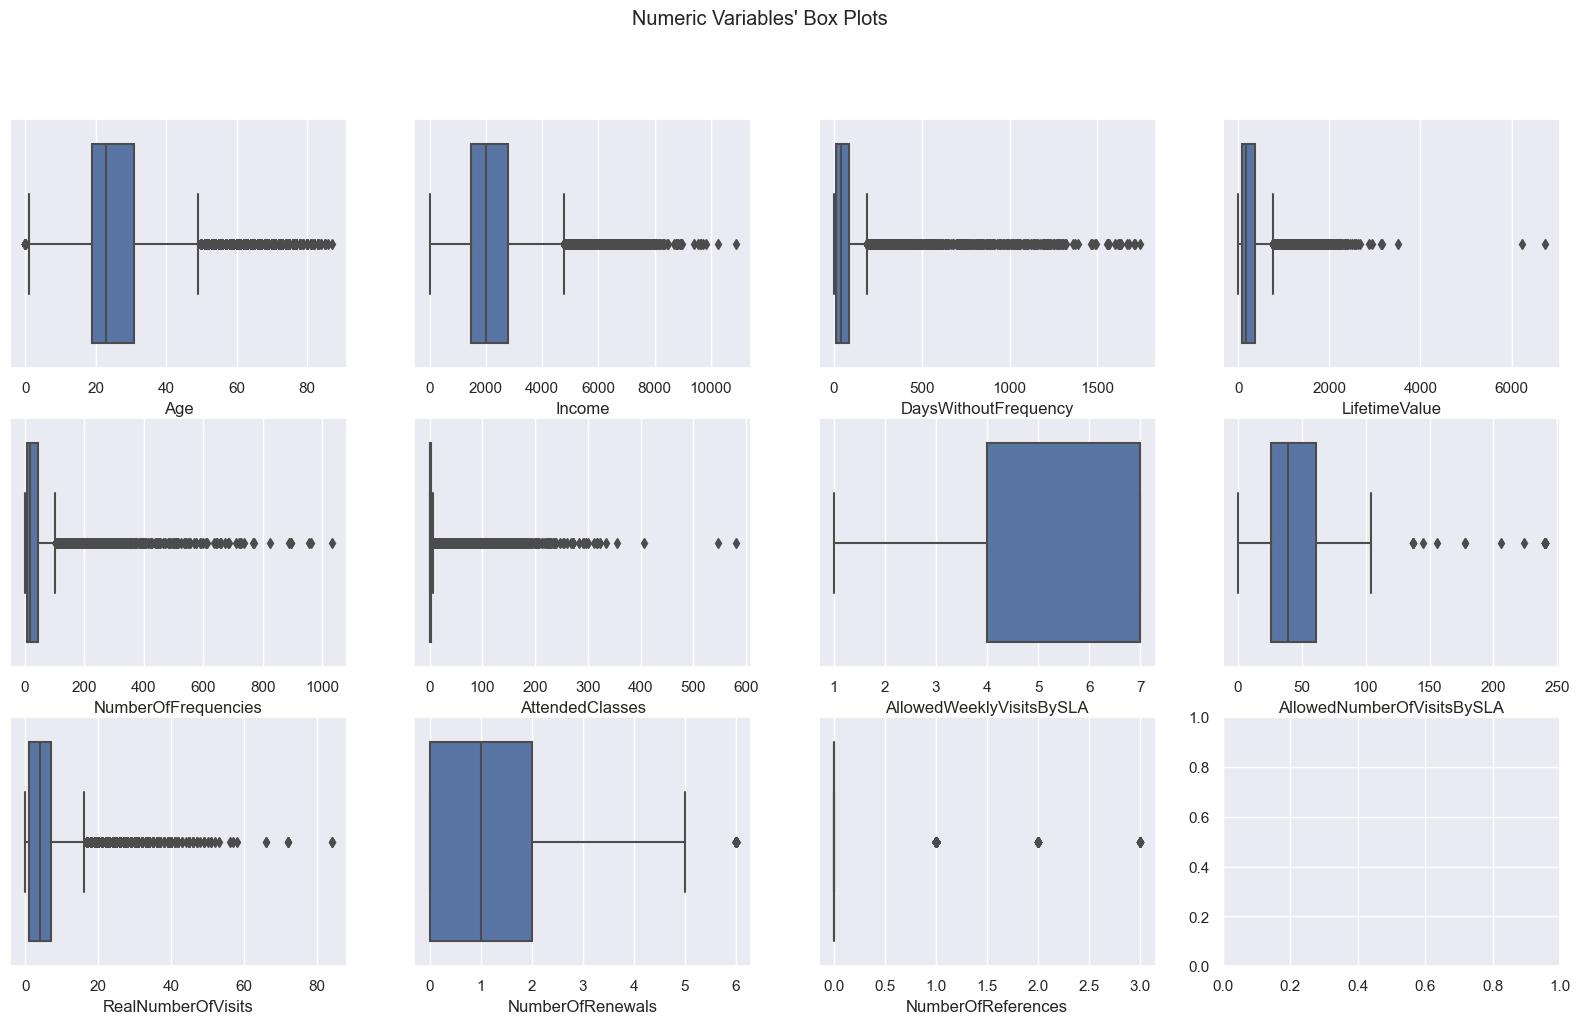

In [20]:
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x=df_copy[feat], ax=ax)
    
plt.suptitle("Numeric Variables' Box Plots")
plt.show()

In [21]:
# remove the two values 

__Pairwise Relationship of Numerical Variables__

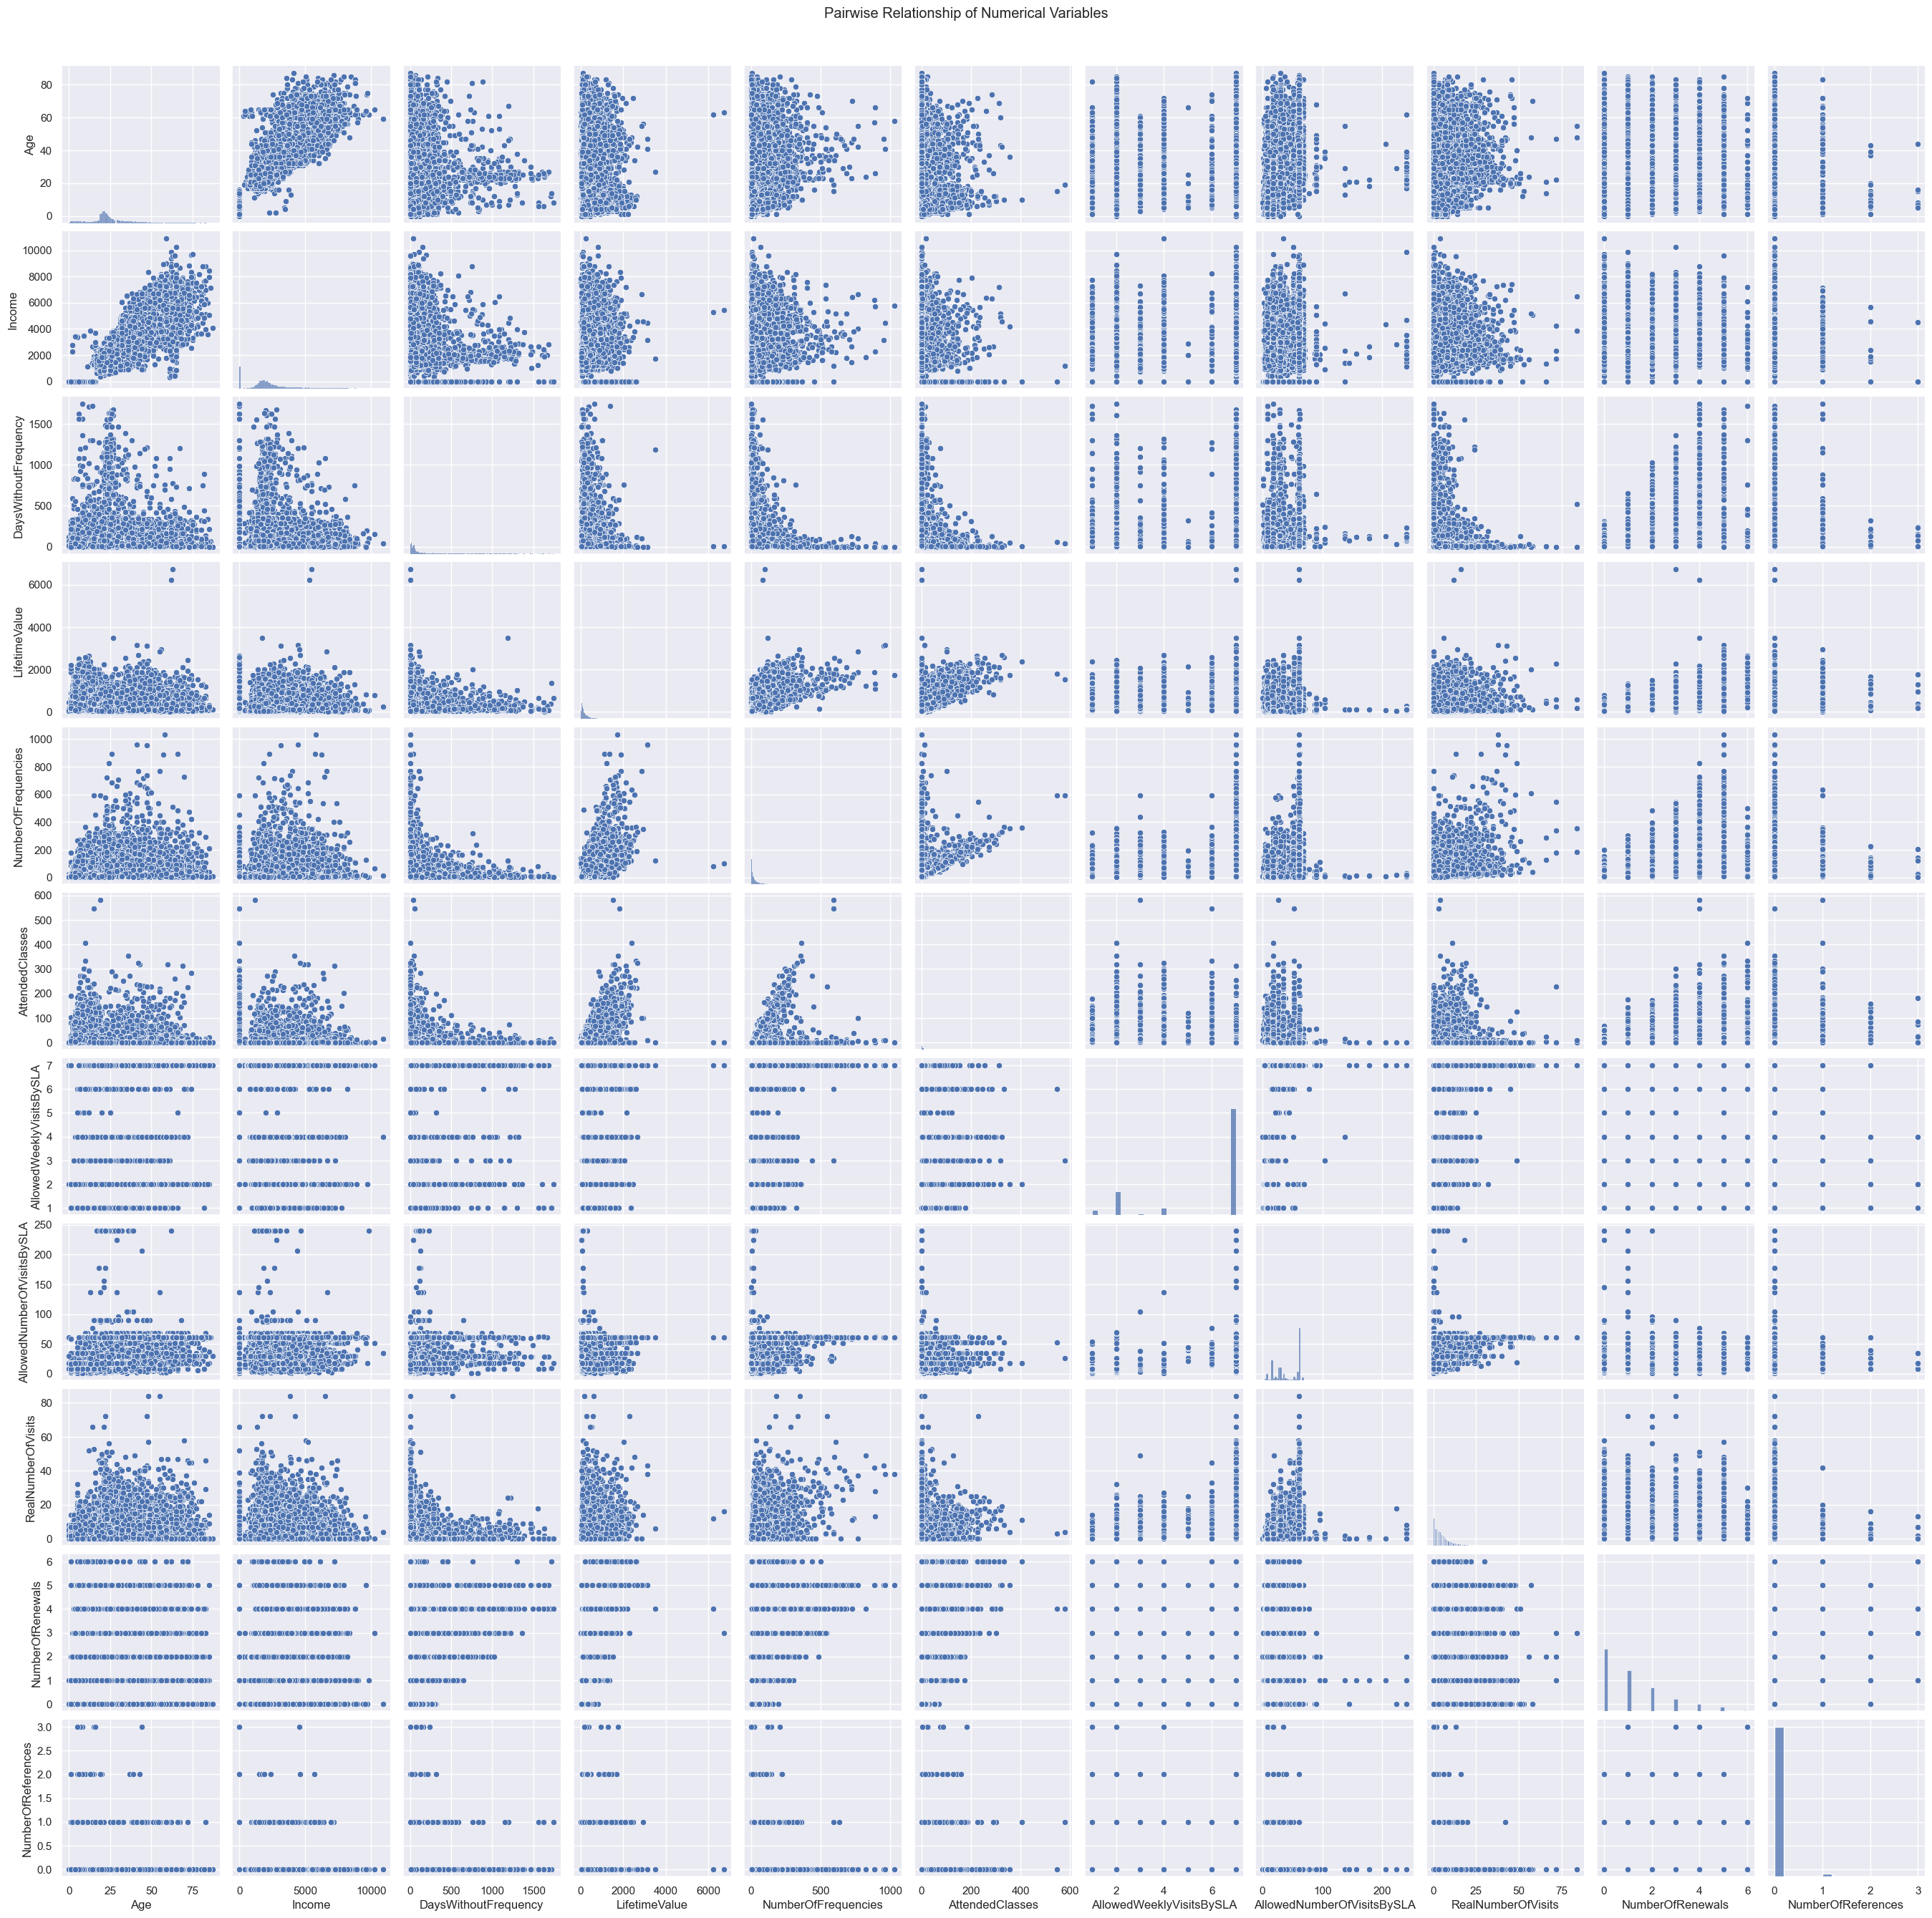

In [22]:
sns.set()

# Setting pairplot
sns.pairplot(df[metric_features], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

if not os.path.exists(os.path.join('..', 'figures', 'exp_analysis')):
    # if the exp_analysis directory is not present then create it first
    os.makedirs(os.path.join('..', 'figures', 'exp_analysis'))

plt.suptitle("Pairwise Relationship of Numerical Variables")
plt.show()

__Metric Variables' Correlation Matrix__

locator: <matplotlib.ticker.AutoLocator object at 0x000001B3A9AB1650>


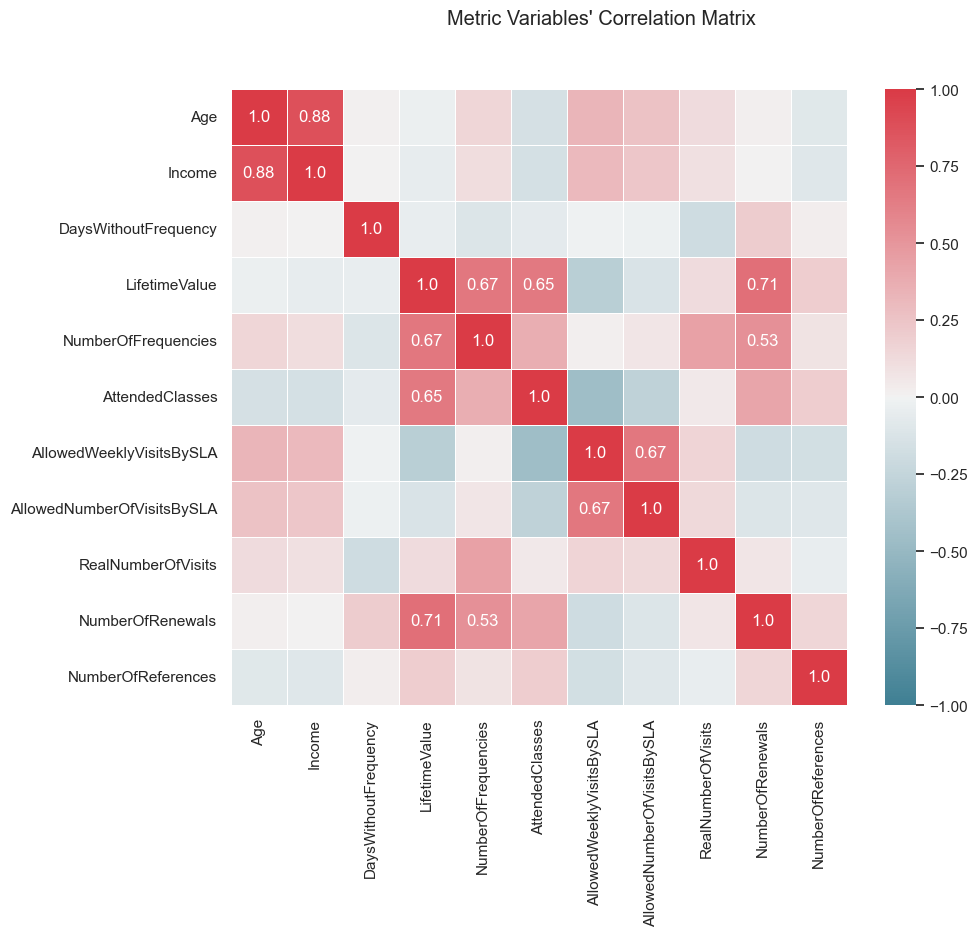

In [23]:
# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(df[metric_features].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

plt.suptitle("Metric Variables' Correlation Matrix")
plt.show()

---------------------

# 3. Data Preprocessing

In [24]:
df.head(5)

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
0,10000,60,0,5500.0,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,...,False,9.0,7,NaN,6.28,2,0,False,0,False
1,10001,29,0,2630.0,2014-08-12,2015-09-14,2015-01-01,2015-12-31,2015-07-16,60,...,False,23.0,1,2.0,17.42,1,2,False,0,True
2,10002,23,1,1980.0,2017-05-02,2017-06-01,2017-01-01,2017-06-30,2017-05-25,7,...,False,6.0,0,7.0,30.03,6,0,False,0,True
3,10003,9,1,0.0,2018-09-05,2019-02-12,2018-07-01,2019-06-30,2019-01-21,22,...,False,20.0,2,2.0,17.72,3,0,False,0,True
4,10004,35,1,4320.0,2016-04-20,2018-06-07,2018-01-01,2018-06-30,2017-11-09,210,...,<NA>,41.0,0,7.0,60.97,0,3,False,0,True


## Missing Values

In [25]:
# Count of missing values
df.isna().sum().sort_values()

ID                              0
NumberOfRenewals                0
RealNumberOfVisits              0
AllowedNumberOfVisitsBySLA      0
AttendedClasses                 0
NumberOfReferences              0
UseByTime                       0
LifetimeValue                   0
DaysWithoutFrequency            0
Dropout                         0
LastPeriodFinish                0
LastPeriodStart                 0
Age                             0
EnrollmentFinish                0
Gender                          0
EnrollmentStart                 0
DateLastVisit                   0
HasReferences                  12
NumberOfFrequencies            26
CombatActivities               33
OtherActivities                35
TeamActivities                 35
FitnessActivities              35
AthleticsActivities            36
RacketActivities               37
WaterActivities                37
SpecialActivities              44
Income                        495
AllowedWeeklyVisitsBySLA      535
dtype: int64

In [26]:
# Fill missing values in 'HasReferences' based on 'NumberOfReferences'
df['HasReferences'] = df['HasReferences'].fillna(df['NumberOfReferences'].gt(0).astype(int))

# If 'NumberOfReferences' is 0, the missing value in 'HasReferences' is filled with 0.
# If 'NumberOfReferences' is greater than 0, the missing value in 'HasReferences' is filled with 1.

df['HasReferences'].isna().sum()

0

In [27]:
df.loc[(df['HasReferences'] == 1) & (df['NumberOfReferences'] == 0), 'HasReferences'] = False

In [28]:
df[(df['HasReferences'] == 1) & (df['NumberOfReferences'] == 0)]

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout


In [29]:
# Fill missing values with the mode
columns_to_fill = ['AthleticsActivities', 'WaterActivities', 'FitnessActivities', 'TeamActivities',
                   'RacketActivities', 'CombatActivities', 'SpecialActivities', 'OtherActivities']
for column in columns_to_fill:
    mode_value = df[column].mode().iloc[0]  # Calculate the mode
    df[column] = df[column].fillna(mode_value)

df.isna().sum()

ID                              0
Age                             0
Gender                          0
Income                        495
EnrollmentStart                 0
EnrollmentFinish                0
LastPeriodStart                 0
LastPeriodFinish                0
DateLastVisit                   0
DaysWithoutFrequency            0
LifetimeValue                   0
UseByTime                       0
AthleticsActivities             0
WaterActivities                 0
FitnessActivities               0
TeamActivities                  0
RacketActivities                0
CombatActivities                0
SpecialActivities               0
OtherActivities                 0
NumberOfFrequencies            26
AttendedClasses                 0
AllowedWeeklyVisitsBySLA      535
AllowedNumberOfVisitsBySLA      0
RealNumberOfVisits              0
NumberOfRenewals                0
HasReferences                   0
NumberOfReferences              0
Dropout                         0
dtype: int64

In [30]:
# Fill missing values with the KNN Imputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")
df[metric_features] = imputer.fit_transform(df[metric_features])

In [31]:
# Recount of missing values
df.isna().sum()

ID                            0
Age                           0
Gender                        0
Income                        0
EnrollmentStart               0
EnrollmentFinish              0
LastPeriodStart               0
LastPeriodFinish              0
DateLastVisit                 0
DaysWithoutFrequency          0
LifetimeValue                 0
UseByTime                     0
AthleticsActivities           0
WaterActivities               0
FitnessActivities             0
TeamActivities                0
RacketActivities              0
CombatActivities              0
SpecialActivities             0
OtherActivities               0
NumberOfFrequencies           0
AttendedClasses               0
AllowedWeeklyVisitsBySLA      0
AllowedNumberOfVisitsBySLA    0
RealNumberOfVisits            0
NumberOfRenewals              0
HasReferences                 0
NumberOfReferences            0
Dropout                       0
dtype: int64

In [32]:
# Handling Boolean Columns
boolean_columns = ['UseByTime', 'AthleticsActivities', 'WaterActivities', 'FitnessActivities',
                   'TeamActivities', 'RacketActivities', 'CombatActivities', 'SpecialActivities',
                   'OtherActivities', 'HasReferences', 'Dropout']

df[boolean_columns] = df[boolean_columns].astype(int)

df.dtypes

ID                                     int64
Age                                  float64
Gender                                 int32
Income                               float64
EnrollmentStart               datetime64[ns]
EnrollmentFinish              datetime64[ns]
LastPeriodStart               datetime64[ns]
LastPeriodFinish              datetime64[ns]
DateLastVisit                 datetime64[ns]
DaysWithoutFrequency                 float64
LifetimeValue                        float64
UseByTime                              int32
AthleticsActivities                    int32
WaterActivities                        int32
FitnessActivities                      int32
TeamActivities                         int32
RacketActivities                       int32
CombatActivities                       int32
SpecialActivities                      int32
OtherActivities                        int32
NumberOfFrequencies                  float64
AttendedClasses                      float64
AllowedWee

## Treating Outliers

__"Manually" filtering the dataset's outliers__

In [33]:
filters1 = ((df['Income']<=8000) &
            (df['DaysWithoutFrequency']<=1000) &
            (df['LifetimeValue']<=2500) &
            (df['NumberOfFrequencies']<=500) &
            (df['AttendedClasses']<=200) &
            (df['RealNumberOfVisits']<=60))

df_1 = df[filters1]

print('Percentage of data kept after removing outliers:', np.round(df_1.shape[0] / df_original.shape[0], 4))

Percentage of data kept after removing outliers: 0.9842


In [34]:
df_1_copy = df_1.copy()

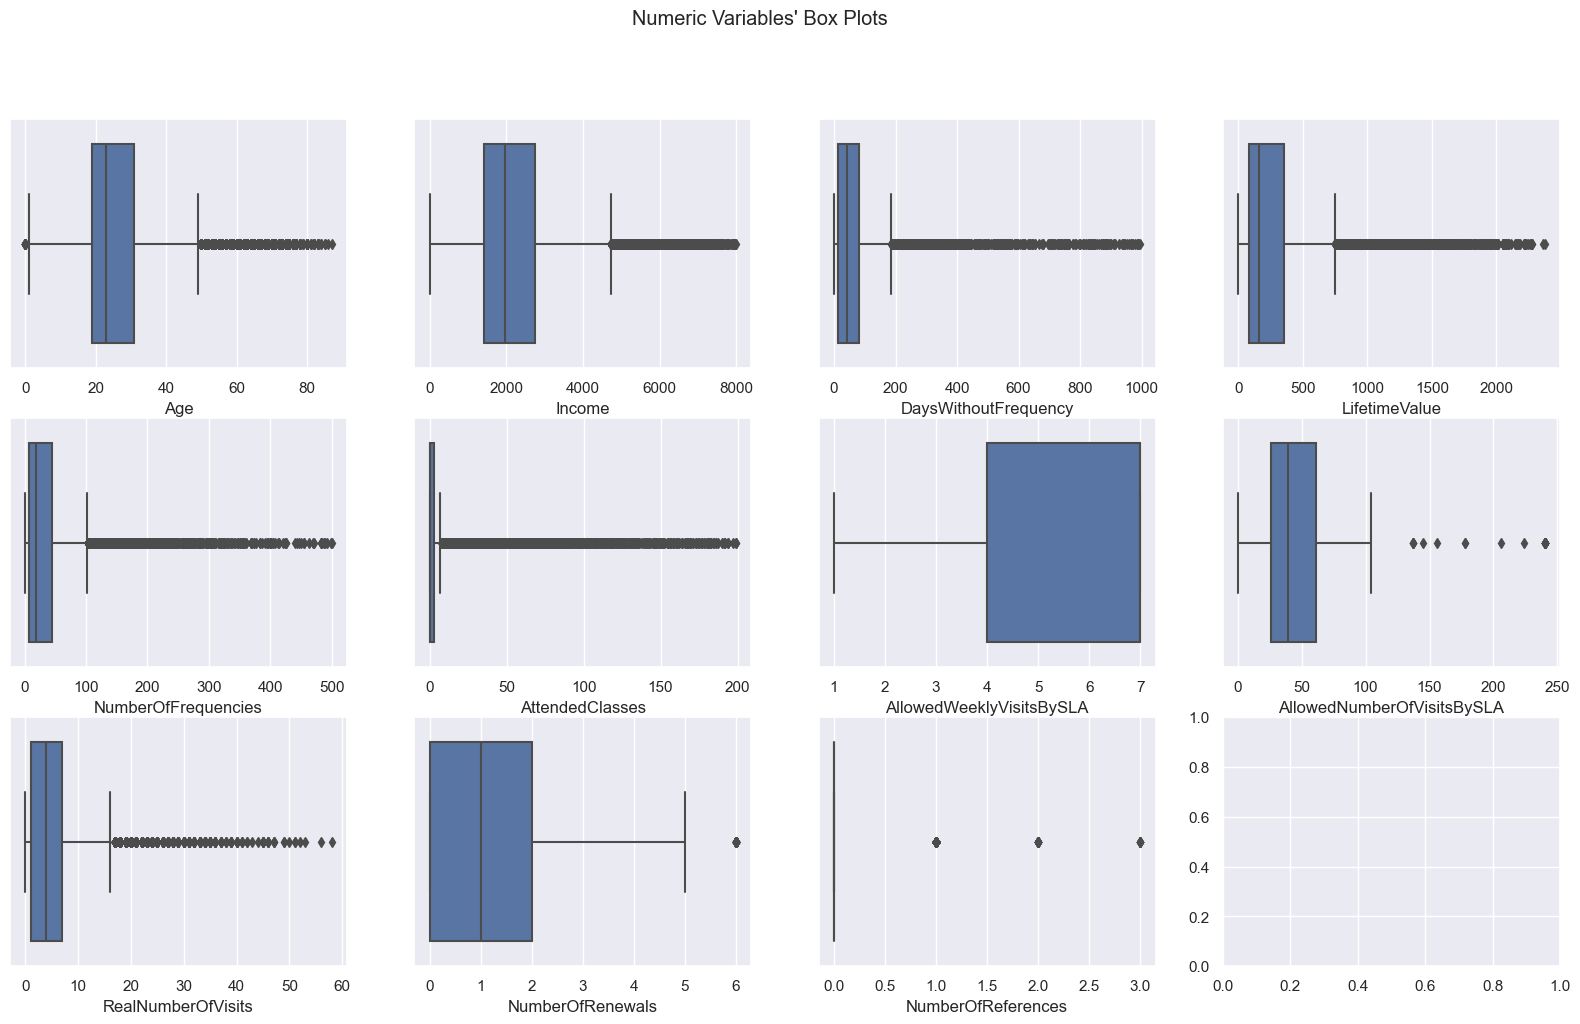

In [35]:
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x=df_1_copy[feat], ax=ax)
    
plt.suptitle("Numeric Variables' Box Plots")
plt.show()

__Outlier removal using only the IQR method__

In [36]:
metric_features = ['Age', 'Income', 'DaysWithoutFrequency', 'LifetimeValue', 'NumberOfFrequencies',
                   'AttendedClasses', 'AllowedWeeklyVisitsBySLA', 'AllowedNumberOfVisitsBySLA',
                   'RealNumberOfVisits', 'NumberOfRenewals', 'NumberOfReferences']

# Calculate quartiles and IQR
q25 = df[metric_features].quantile(.25)
q75 = df[metric_features].quantile(.75)
iqr = (q75 - q25)

# Define lower and upper bounds
upper_lim = q75 + 1.5 * iqr   # 1.5 is a value we can change
lower_lim = q25 - 1.5 * iqr

# Remove outliers
filters2 = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(df[metric].between(llim, ulim, inclusive='both'))

filters2 = pd.Series(np.all(filters2, 0))
df_2 = df[filters2]

print('Percentage of data kept after removing outliers:', np.round(df_2.shape[0] / df_original.shape[0], 4))

Percentage of data kept after removing outliers: 0.5551


__Combining different outlier methods__

In [37]:
# More robust/consistent outlier detection method:
df_3 = df[(filters1 | filters2)]
print('Percentage of data kept after removing outliers:', np.round(df_3.shape[0] / df_original.shape[0], 4))
# this way only if i have an observation consider outlier in both of the approaches than i will call it an outlier

Percentage of data kept after removing outliers: 0.9842


In [66]:
# Get the manual filtering version
df_features = df_1.copy()

## Feature Engineering

## Variable selection: Redundancy VS Relevancy

**Redundancy:** Handling highly correlated variables

**Relevancy:** Selecting variables based on the relevancy of each one to the task.

Example: remove uncorrelated variables with the target, stepwise regression, use variables for product clustering, use variables for socio-demographic clustering, ...   
Variables that aren't correlated with any other variable are often also not relevant. In this case we will not focus on this a lot since we don't have a defined task yet.

In [67]:
df_features.drop(['LastPeriodStart','LastPeriodFinish'],axis=1,inplace=True)

In [78]:
# The DaysWithoutFrequency are the days between the DateLastVisit and the EnrollmentFinish
df_features[df_features['DateLastVisit'] + pd.to_timedelta(df_features['DaysWithoutFrequency'], unit='D') == df_features['EnrollmentFinish']]

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,UseByTime,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
0,10000,60.0,0,5500.0,2019-09-03,2019-10-31,2019-10-30,1.0,89.35,0,...,0,9.0,7.0,6.0,6.28,2.0,0.0,0,0.0,0
1,10001,29.0,0,2630.0,2014-08-12,2015-09-14,2015-07-16,60.0,479.20,0,...,0,23.0,1.0,2.0,17.42,1.0,2.0,0,0.0,1
2,10002,23.0,1,1980.0,2017-05-02,2017-06-01,2017-05-25,7.0,37.60,0,...,0,6.0,0.0,7.0,30.03,6.0,0.0,0,0.0,1
3,10003,9.0,1,0.0,2018-09-05,2019-02-12,2019-01-21,22.0,155.40,0,...,0,20.0,2.0,2.0,17.72,3.0,0.0,0,0.0,1
4,10004,35.0,1,4320.0,2016-04-20,2018-06-07,2017-11-09,210.0,373.20,0,...,0,41.0,0.0,7.0,60.97,0.0,3.0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14935,24935,23.0,0,1440.0,2016-11-02,2018-01-07,2017-10-23,76.0,248.00,0,...,0,89.0,0.0,7.0,60.97,0.0,1.0,0,0.0,1
14936,24936,21.0,0,1820.0,2016-11-11,2017-08-29,2017-06-14,76.0,124.50,0,...,0,12.0,0.0,7.0,60.97,1.0,2.0,0,0.0,1
14938,24938,39.0,1,2600.0,2015-09-17,2016-06-04,2016-04-27,38.0,343.85,0,...,0,57.0,0.0,7.0,60.97,3.0,0.0,0,0.0,1
14939,24939,20.0,1,1810.0,2017-03-01,2017-03-31,2017-03-29,2.0,43.60,0,...,0,6.0,0.0,7.0,30.03,8.0,0.0,0,0.0,1


In [80]:
df_features['UseByTime'].value_counts(normalize=True)

UseByTime
0    0.953284
1    0.046716
Name: proportion, dtype: float64

In [86]:
df_features[df_features['EnrollmentStart']==df_features['EnrollmentFinish']].loc[:,'EnrollmentStart':'UseByTime']

,EnrollmentStart,EnrollmentFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,UseByTime
25,2015-09-09,2015-09-09,2019-10-26,5.0,596.30,0
36,2014-10-02,2014-10-02,2019-10-22,9.0,2209.97,0
38,2018-09-29,2018-09-29,2019-10-30,1.0,554.60,0
49,2018-09-03,2018-09-03,2019-10-29,2.0,540.10,0
51,2018-08-17,2018-08-17,2019-10-28,3.0,852.30,0
...,...,...,...,...,...,...
14918,2014-12-10,2014-12-10,2019-10-31,0.0,1583.90,0
14919,2019-07-18,2019-07-18,2019-10-31,0.0,201.20,0
14926,2018-10-08,2018-10-08,2019-10-29,2.0,196.10,0
14937,2016-09-08,2016-09-08,2019-10-29,2.0,1460.45,0


In [93]:
df_features[df_features['LifetimeValue'] == df_features['LifetimeValue'].max()]

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,UseByTime,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
976,10976,13.0,0,0.0,2014-08-12,2014-08-12,2019-10-24,7.0,2373.8,0,...,0,122.0,87.0,1.0,8.71,5.0,6.0,0,0.0,0


In [109]:
# Calcular a diferença de tempo e criar uma nova coluna no DataFrame
df_features['EnrollmentPeriod'] = df_features.apply(lambda row: (row['EnrollmentFinish'] - row['EnrollmentStart']).days, axis=1)

# Exibir o DataFrame resultante
df_features.drop(['ID','EnrollmentStart','EnrollmentFinish'], axis=1, inplace=True)

In [111]:
df_features.drop('DateLastVisit',axis=1,inplace=True)

In [113]:
df_features.dtypes

Age                           float64
Gender                          int32
Income                        float64
DaysWithoutFrequency          float64
LifetimeValue                 float64
UseByTime                       int32
AthleticsActivities             int32
WaterActivities                 int32
FitnessActivities               int32
TeamActivities                  int32
RacketActivities                int32
CombatActivities                int32
SpecialActivities               int32
OtherActivities                 int32
NumberOfFrequencies           float64
AttendedClasses               float64
AllowedWeeklyVisitsBySLA      float64
AllowedNumberOfVisitsBySLA    float64
RealNumberOfVisits            float64
NumberOfRenewals              float64
HasReferences                   int32
NumberOfReferences            float64
Dropout                         int32
EnrollmentPeriod                int64
dtype: object

In [135]:
metric_features = ['Age', 'Income', 'DaysWithoutFrequency', 'LifetimeValue', 'NumberOfFrequencies',
                   'AttendedClasses', 'AllowedWeeklyVisitsBySLA', 'AllowedNumberOfVisitsBySLA',
                   'RealNumberOfVisits', 'NumberOfRenewals', 'NumberOfReferences','EnrollmentPeriod']
bin_features = ['Gender', 'UseByTime', 'AthleticsActivities', 'WaterActivities',
                'FitnessActivities', 'TeamActivities', 'RacketActivities',
                'CombatActivities', 'SpecialActivities', 'OtherActivities',
                'HasReferences', 'Dropout']

## Scaling

__Use MinMaxScaler to scale the data:__

In [136]:
df_minmax = df_features.copy()

In [137]:
scaler = MinMaxScaler()
df_minmax[metric_features] = scaler.fit_transform(df_minmax[metric_features])
df_minmax.head()

,Age,Gender,Income,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,...,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout,EnrollmentPeriod
0,0.689655,0,0.688360,0.001004,0.037640,0,0,0,1,0,...,0.016032,0.035176,0.833333,0.023886,0.034483,0.000000,0,0.0,0,0.030446
1,0.333333,0,0.329161,0.060241,0.201870,0,0,0,0,0,...,0.044088,0.005025,0.166667,0.070405,0.017241,0.333333,0,0.0,1,0.208924
2,0.264368,1,0.247810,0.007028,0.015840,0,0,0,1,0,...,0.010020,0.000000,1.000000,0.123063,0.103448,0.000000,0,0.0,1,0.015748
3,0.103448,1,0.000000,0.022088,0.065465,0,0,0,0,1,...,0.038076,0.010050,0.166667,0.071658,0.051724,0.000000,0,0.0,1,0.083990
4,0.402299,1,0.540676,0.210843,0.157216,0,0,0,1,0,...,0.080160,0.000000,1.000000,0.252265,0.000000,0.500000,0,0.0,1,0.408399


In [138]:
# Checking max and min of minmaxed variables
df_minmax[metric_features].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,14706.0,0.30,0.16,0.0,0.22,0.26,0.36,1.0
Income,14706.0,0.27,0.19,0.0,0.18,0.25,0.34,1.0
DaysWithoutFrequency,14706.0,0.07,0.11,0.0,0.01,0.04,0.08,1.0
LifetimeValue,14706.0,0.12,0.14,0.0,0.04,0.07,0.15,1.0
NumberOfFrequencies,14706.0,0.07,0.11,0.0,0.01,0.03,0.09,1.0
AttendedClasses,14706.0,0.05,0.13,0.0,0.00,0.00,0.02,1.0
AllowedWeeklyVisitsBySLA,14706.0,0.79,0.35,0.0,0.50,1.00,1.00,1.0
AllowedNumberOfVisitsBySLA,14706.0,0.17,0.09,0.0,0.11,0.16,0.25,1.0
RealNumberOfVisits,14706.0,0.09,0.10,0.0,0.02,0.07,0.12,1.0
NumberOfRenewals,14706.0,0.19,0.22,0.0,0.00,0.17,0.33,1.0


__Use StandardScaler to scale the data:__

In [139]:
df_standard = df_features.copy()

In [140]:
scaler = StandardScaler()  # Standardize features by removing the mean and scaling to unit variance.
df_standard[metric_features] = scaler.fit_transform(df_standard[metric_features])
df_standard.head()

,Age,Gender,Income,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,...,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout,EnrollmentPeriod
0,2.439304,0,2.170984,-0.672150,-0.602946,0,0,0,1,0,...,-0.530403,-0.094251,0.117054,-1.679343,-0.535635,-0.868564,0,-0.130675,0,-0.672208
1,0.224623,0,0.302184,-0.127899,0.556421,0,0,0,0,0,...,-0.269416,-0.335054,-1.778866,-1.149688,-0.702330,0.623795,0,-0.130675,1,0.313778
2,-0.204025,1,-0.121063,-0.616802,-0.756845,0,0,0,1,0,...,-0.586329,-0.375187,0.591034,-0.550142,0.131149,-0.868564,0,-0.130675,1,-0.753406
3,-1.204204,1,-1.410340,-0.478433,-0.406521,0,0,0,0,1,...,-0.325342,-0.294920,-1.778866,-1.135424,-0.368939,-0.868564,0,-0.130675,1,-0.376412
4,0.653271,1,1.402627,1.255791,0.241190,0,0,0,1,0,...,0.066138,-0.375187,0.591034,0.920911,-0.869026,1.369975,0,-0.130675,1,1.415762


In [141]:
# Checking mean and variance of standardized variables
df_standard[metric_features].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,14706.0,0.0,1.0,-1.85,-0.49,-0.20,0.37,4.37
Income,14706.0,0.0,1.0,-1.41,-0.49,-0.13,0.37,3.79
DaysWithoutFrequency,14706.0,0.0,1.0,-0.68,-0.56,-0.30,0.08,8.51
LifetimeValue,14706.0,0.0,1.0,-0.87,-0.62,-0.38,0.17,6.19
NumberOfFrequencies,14706.0,0.0,1.0,-0.68,-0.57,-0.36,0.14,8.62
AttendedClasses,14706.0,-0.0,1.0,-0.38,-0.38,-0.38,-0.25,7.61
AllowedWeeklyVisitsBySLA,14706.0,0.0,1.0,-2.25,-0.83,0.59,0.59,0.59
AllowedNumberOfVisitsBySLA,14706.0,-0.0,1.0,-1.95,-0.76,-0.12,0.92,9.43
RealNumberOfVisits,14706.0,0.0,1.0,-0.87,-0.70,-0.20,0.30,8.80
NumberOfRenewals,14706.0,0.0,1.0,-0.87,-0.87,-0.12,0.62,3.61


In [142]:
df_mm_cluster = df_minmax.copy()

# Clustering

## Hierarchical Clustering

In [143]:
# Performing HC
hclust = AgglomerativeClustering(linkage='ward', metric='euclidean', n_clusters=5)
hc_labels = hclust.fit_predict(df_mm_cluster[metric_features])
hc_labels

array([4, 0, 1, ..., 1, 3, 2], dtype=int64)

In [144]:
Counter(hc_labels)

Counter({1: 7254, 0: 2665, 4: 1956, 2: 1635, 3: 1196})

In [145]:
# Characterizing the clusters
df_concat = pd.concat((df_mm_cluster, pd.Series(hc_labels, name='labels', index=df.index)), axis=1)

df_concat.groupby('labels').mean()

,Age,Gender,Income,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,...,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout,EnrollmentPeriod
labels,,,,,,,,,,,,,,,,,,,,,
0,0.227970,0.393246,0.184544,0.074003,0.113268,0.007129,0.004128,0.607880,0.104315,0.162101,...,0.035653,0.077234,0.214159,0.076698,0.054170,0.139087,0.035272,0.014134,0.806379,0.127079
1,0.267223,0.381583,0.238484,0.070624,0.057280,0.037083,0.005928,0.116763,0.775021,0.012821,...,0.043664,0.001311,0.995318,0.202019,0.094300,0.095442,0.002895,0.001057,0.882548,0.101516
2,0.368343,0.488073,0.348828,0.101388,0.257989,0.173089,0.011621,0.275229,0.711927,0.050765,...,0.222983,0.033833,0.993374,0.211624,0.122915,0.546177,0.015902,0.005301,0.752294,0.420543
3,0.165590,0.448997,0.100561,0.076153,0.417515,0.006689,0.007525,0.826087,0.076087,0.155518,...,0.156000,0.343998,0.237179,0.079387,0.082070,0.551421,0.102843,0.038462,0.394649,0.221932
4,0.523653,0.384969,0.549137,0.063521,0.087450,0.055215,0.012781,0.211656,0.687628,0.009202,...,0.056941,0.004483,0.997495,0.209381,0.099332,0.121421,0.008180,0.002897,0.812372,0.106890


In [ ]:
### Defining the linkage method to choose:

In [150]:
# Computing SST
X = df_mm_cluster[metric_features].values
sst = np.sum(np.square(X - X.mean(axis=0)), axis=0)

# Computing SSW
ssw_iter = []
for i in np.unique(hc_labels):
    X_k = X[hc_labels == i]
    ssw_iter.append(np.sum(np.square(X_k - X_k.mean(axis=0)), axis=0))
ssw = np.sum(ssw_iter, axis=0)

# Computing SSB
ssb_iter = []
for i in np.unique(hc_labels):
    X_k = X[hc_labels == i]
    ssb_iter.append(X_k.shape[0] * np.square(X_k.mean(axis=0) - X.mean(axis=0)))
ssb = np.sum(ssb_iter, axis=0)

# Verifying the formula
np.round(sst) == np.round((ssw + ssb))

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])